In [70]:
from cpymad.madx import Madx
from pyoptics import optics
import matplotlib.pyplot as plt
import numpy as np
import inspect


# Standard imports
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns


# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

In [2]:
# Build sequence
mad = Madx()

# Prepare for building sequence
mad.input("""
option,-echo,-info;
system,"mkdir temp";
""")

# Build sequence
mad.input("""
call,file="modules/hllhc16/lhc.seq";
call,file="modules/hllhc16/hllhc_sequence.madx";
call,file="modules/hllhc16/toolkit/macro.madx";
""")

# Give a beam with correct energy
mad.input("""
exec,mk_beam(450);
""")


# Injection optics (beta* = 6m)
mad.input("""
call,file="modules/hllhc16/strengths/ramp/opt_ramp_6000.madx";
""")




  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2023.11.30 15:14:27      +
  ++++++++++++++++++++++++++++++++++++++++++++


mkdir: cannot create directory ‘temp’: File exists


++++++ warning: implicit element re-definition ignored: ip1
++++++ warning: implicit element re-definition ignored: mbas2.1r1
++++++ warning: implicit element re-definition ignored: tas.1r1
++++++ warning: implicit element re-definition ignored: mqxa.1r1
++++++ warning: implicit element re-definition ignored: mcbxh.1r1
++++++ warning: implicit element re-definition ignored: mcbxv.1r1
++++++ warning: implicit element re-definition ignored: mqxb.a2r1
++++++ warning: implicit element re-definition ignored: mcbxh.2r1
++++++ warning: implicit element re-definition ignored: mcbxv.2r1
++++++ warning: implicit element re-definition ignored: mqxb.b2r1
++++++ warning: implicit element re-definition ignored: tasb.3r1
++++++ warning: implicit element re-definition ignored: mqsx.3r1
++++++ warning: implicit element re-definition ignored: mqxa.3r1
++++++ warning: implicit element re-definition ignored: mcbxh.3r1
++++++ warning: implicit element re-definition ignored: mcbxv.3r1
++++++ warning: implic

True

In [3]:
# Rematch optics
mad.input("""
call,file="modules/hllhc16/toolkit/rematch_hllhc.madx";      
""")

# Check that everything is ok at IPs and output twiss files
mad.input("""
exec,check_ip(b1);
exec,check_ip(b2);
"""
)

GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large bl

Max number of match macros reached. Augmenting.
number of variables:    2
user given constraints: 0
total constraints:      4

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.1511925288920255E-23


++++++ warning: JACOBIAN  penalty function already ok
 Final difference norm:   0.0000000000000000     

MATCH SUMMARY

--------------------------------------------------------------------
macro: phasearc(1,2,12,b1) 
  constraint: mux12b1=refmux12b1                      
  values:     +5.24416e+00=+5.24416e+00
  weight:     +1.00000e+00
  penalty:    +5.43565e-13

  constraint: muy12b1=refmuy12b1                      
  values:     +5.21827e+00=+5.21827e+00
  weight:     +1.00000e+00
  penalty:    +6.82121e-13

macro: phasearc(1,2,12,b2) 
  constraint: mux12b2=refmux12b2                      
  values:     +5.21789e+00=+5.21789e+00
  weight:     +1.00000e+00
  penalty:    +6.35936e-13

  constraint: muy12b2=refmuy12b2                      
  values:     +5.24

GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance


enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.000347514465190797 53.6430616051343 

q1 dq1 betxmax dxmax 
62.3100000000251 1.99999999997718 617.185196737416 2.71636221390437 

dxrms xcomax xcorms q2 
1.49005545424859 0 0 60.3200000000334 

dq2 betymax dymax dyrms 
1.99999999999946 683.999793986822 -0 0 

ycomax ycorms deltap synch_1 
0 0 0 0 

synch_2 synch_3 synch_4 synch_5 
0 0 0 0 

synch_6 synch_8 nflips dqmin 
0 0 0 0 

dqmin_phase 
0 
refbetxip1b1       = 6.00000000000275 ;
refbetyip1b1       = 6.00000000002778 ;
refbetxip5b1       = 6.00000000002582 ;
refbetyip5b1       = 6.00000000002185 ;
refbetxip2b1       = 9.99999999999678 ;
refbetyip2b1       = 9.99999999998532 ;
refbetxip8b1       = 10.0000000000039 ;
refbetyip8b1       = 9.99999999995172 ;
refqxb1            = 62.310000000025

True

In [4]:
# Save optics
mad.input("""
exec,save_optics_hllhc(opt_inj_6000.madx);
""")

GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 110592):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large bl

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

length orbit5 alfa gammatr 
106.902968193049 -0 0.000445817412220707 47.3610679387236 

q1 dq1 betxmax dxmax 
0.249999972035929 -0.420355701976874 177.458420774625 2.18685634529819 

dxrms xcomax xcorms q2 
1.68138654000668 0 0 0.249999989420895 

dq2 betymax dymax dyrms 
0.234442556325668 177.473178718679 -0 0 

ycomax ycorms deltap synch_1 
0 0 0 0 

synch_2 synch_3 synch_4 synch_5 
0 0 0 0 

synch_6 synch_8 nflips dqmin 
0 0 0 0 

dqmin_phase 
0 
enter Twiss module
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

length orbit5 alfa gammatr 
962.126713737445 -0 

True

In [45]:
# Reload optics from madx
mad.input("""
call,file="opt_inj_6000.madx";
""")
mad.input("""
exec,check_ip(b1);
exec,check_ip(b2);
"""
)


enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.000347514465190798 53.6430616051343 

q1 dq1 betxmax dxmax 
62.3100000000251 1.99999999997718 617.185196737416 2.71636221390435 

dxrms xcomax xcorms q2 
1.49005545424859 0 0 60.3200000000334 

dq2 betymax dymax dyrms 
1.99999999999939 683.99979398683 -0 0 

ycomax ycorms deltap synch_1 
0 0 0 0 

synch_2 synch_3 synch_4 synch_5 
0 0 0 0 

synch_6 synch_8 nflips dqmin 
0 0 0 0 

dqmin_phase 
0 
refbetxip1b1       = 6.00000000000279 ;
refbetyip1b1       = 6.00000000002768 ;
refbetxip5b1       = 6.00000000002592 ;
refbetyip5b1       = 6.00000000002192 ;
refbetxip2b1       = 9.99999999999661 ;
refbetyip2b1       = 9.99999999998557 ;
refbetxip8b1       = 10.0000000000039 ;
refbetyip8b1       = 9.99999999995183 ;
refqxb1            = 62.3100000000251

True

In [40]:
# Load Twiss
t=optics.open('twiss_lhcb1.tfs')
#plt.plot(t.s,abs(np.cumsum(t.drvterm(4,0)*t.k3l)))
#plt.plot(t.s,abs(np.cumsum(t.drvterm(0,-4)*t.k3l)))

In [65]:
# t contains all elements, including their strengths
# Using regex (on t.name under the hood), one can select the k3 strength 
# (which normally only applies to octupoles, but which is available for all elements)
# And assign a given value to it
# All other strengths are still at zero by default
t.k3l[t//'mo.*']=0.1

In [66]:
# Print the source code of the function
print(inspect.getsource(t.drvterm))

    def drvterm(t, m=0, n=0, p=0, q=0):
        dv = t.betx ** (abs(m) / 2.0) * t.bety ** (abs(n) / 2.0)
        dv = dv * np.exp(+2j * np.pi * ((m - 2 * p) * t.mux + (n - 2 * q) * t.muy))
        return dv



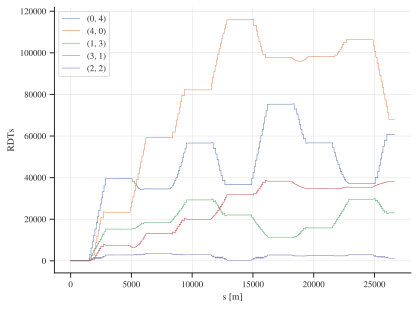

In [78]:
# Plot RDTs
for RDT in [(0,4), (4,0), (1,3), (3,1), (2,2)]:
    plt.plot(t.s,abs(np.cumsum(t.drvterm(*RDT)*t.k3l)), label = str(RDT))
#plt.plot(t.s,abs(np.cumsum(t.drvterm(4,0)*t.k3l)), label = str(RDT))
#plt.plot(t.s,abs(np.cumsum(t.drvterm(0,-4)*t.k3l)), label = str(RDT))
plt.xlabel('s [m]')
plt.ylabel('RDTs (a.u.)')
plt.legend()
plt.grid()
plt.show()